In [2]:
#step one loading the dataset
import pandas as pd
file_path = r"diabetes.csv"
data = pd.read_csv(file_path)
print(data.head())
print(data.info())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

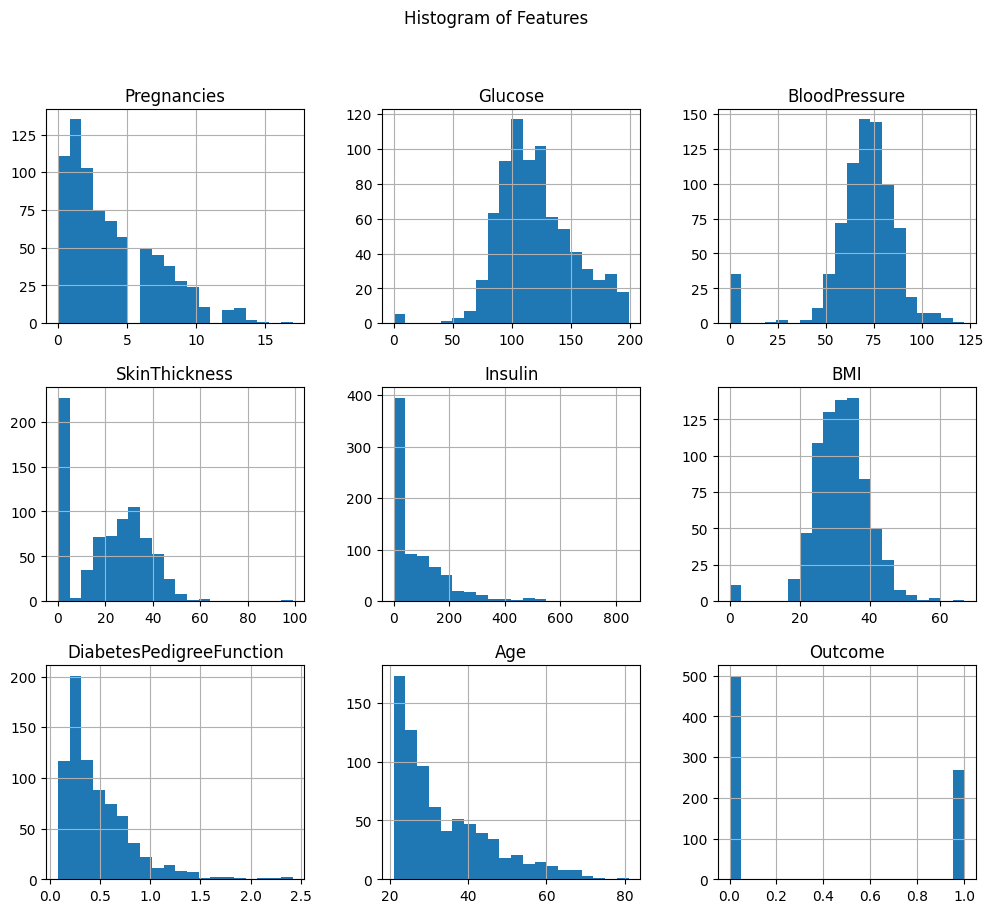

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
f = r"diabetes.csv"
data = pd.read_csv(f)
data.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogram of Features")
plt.show()

 



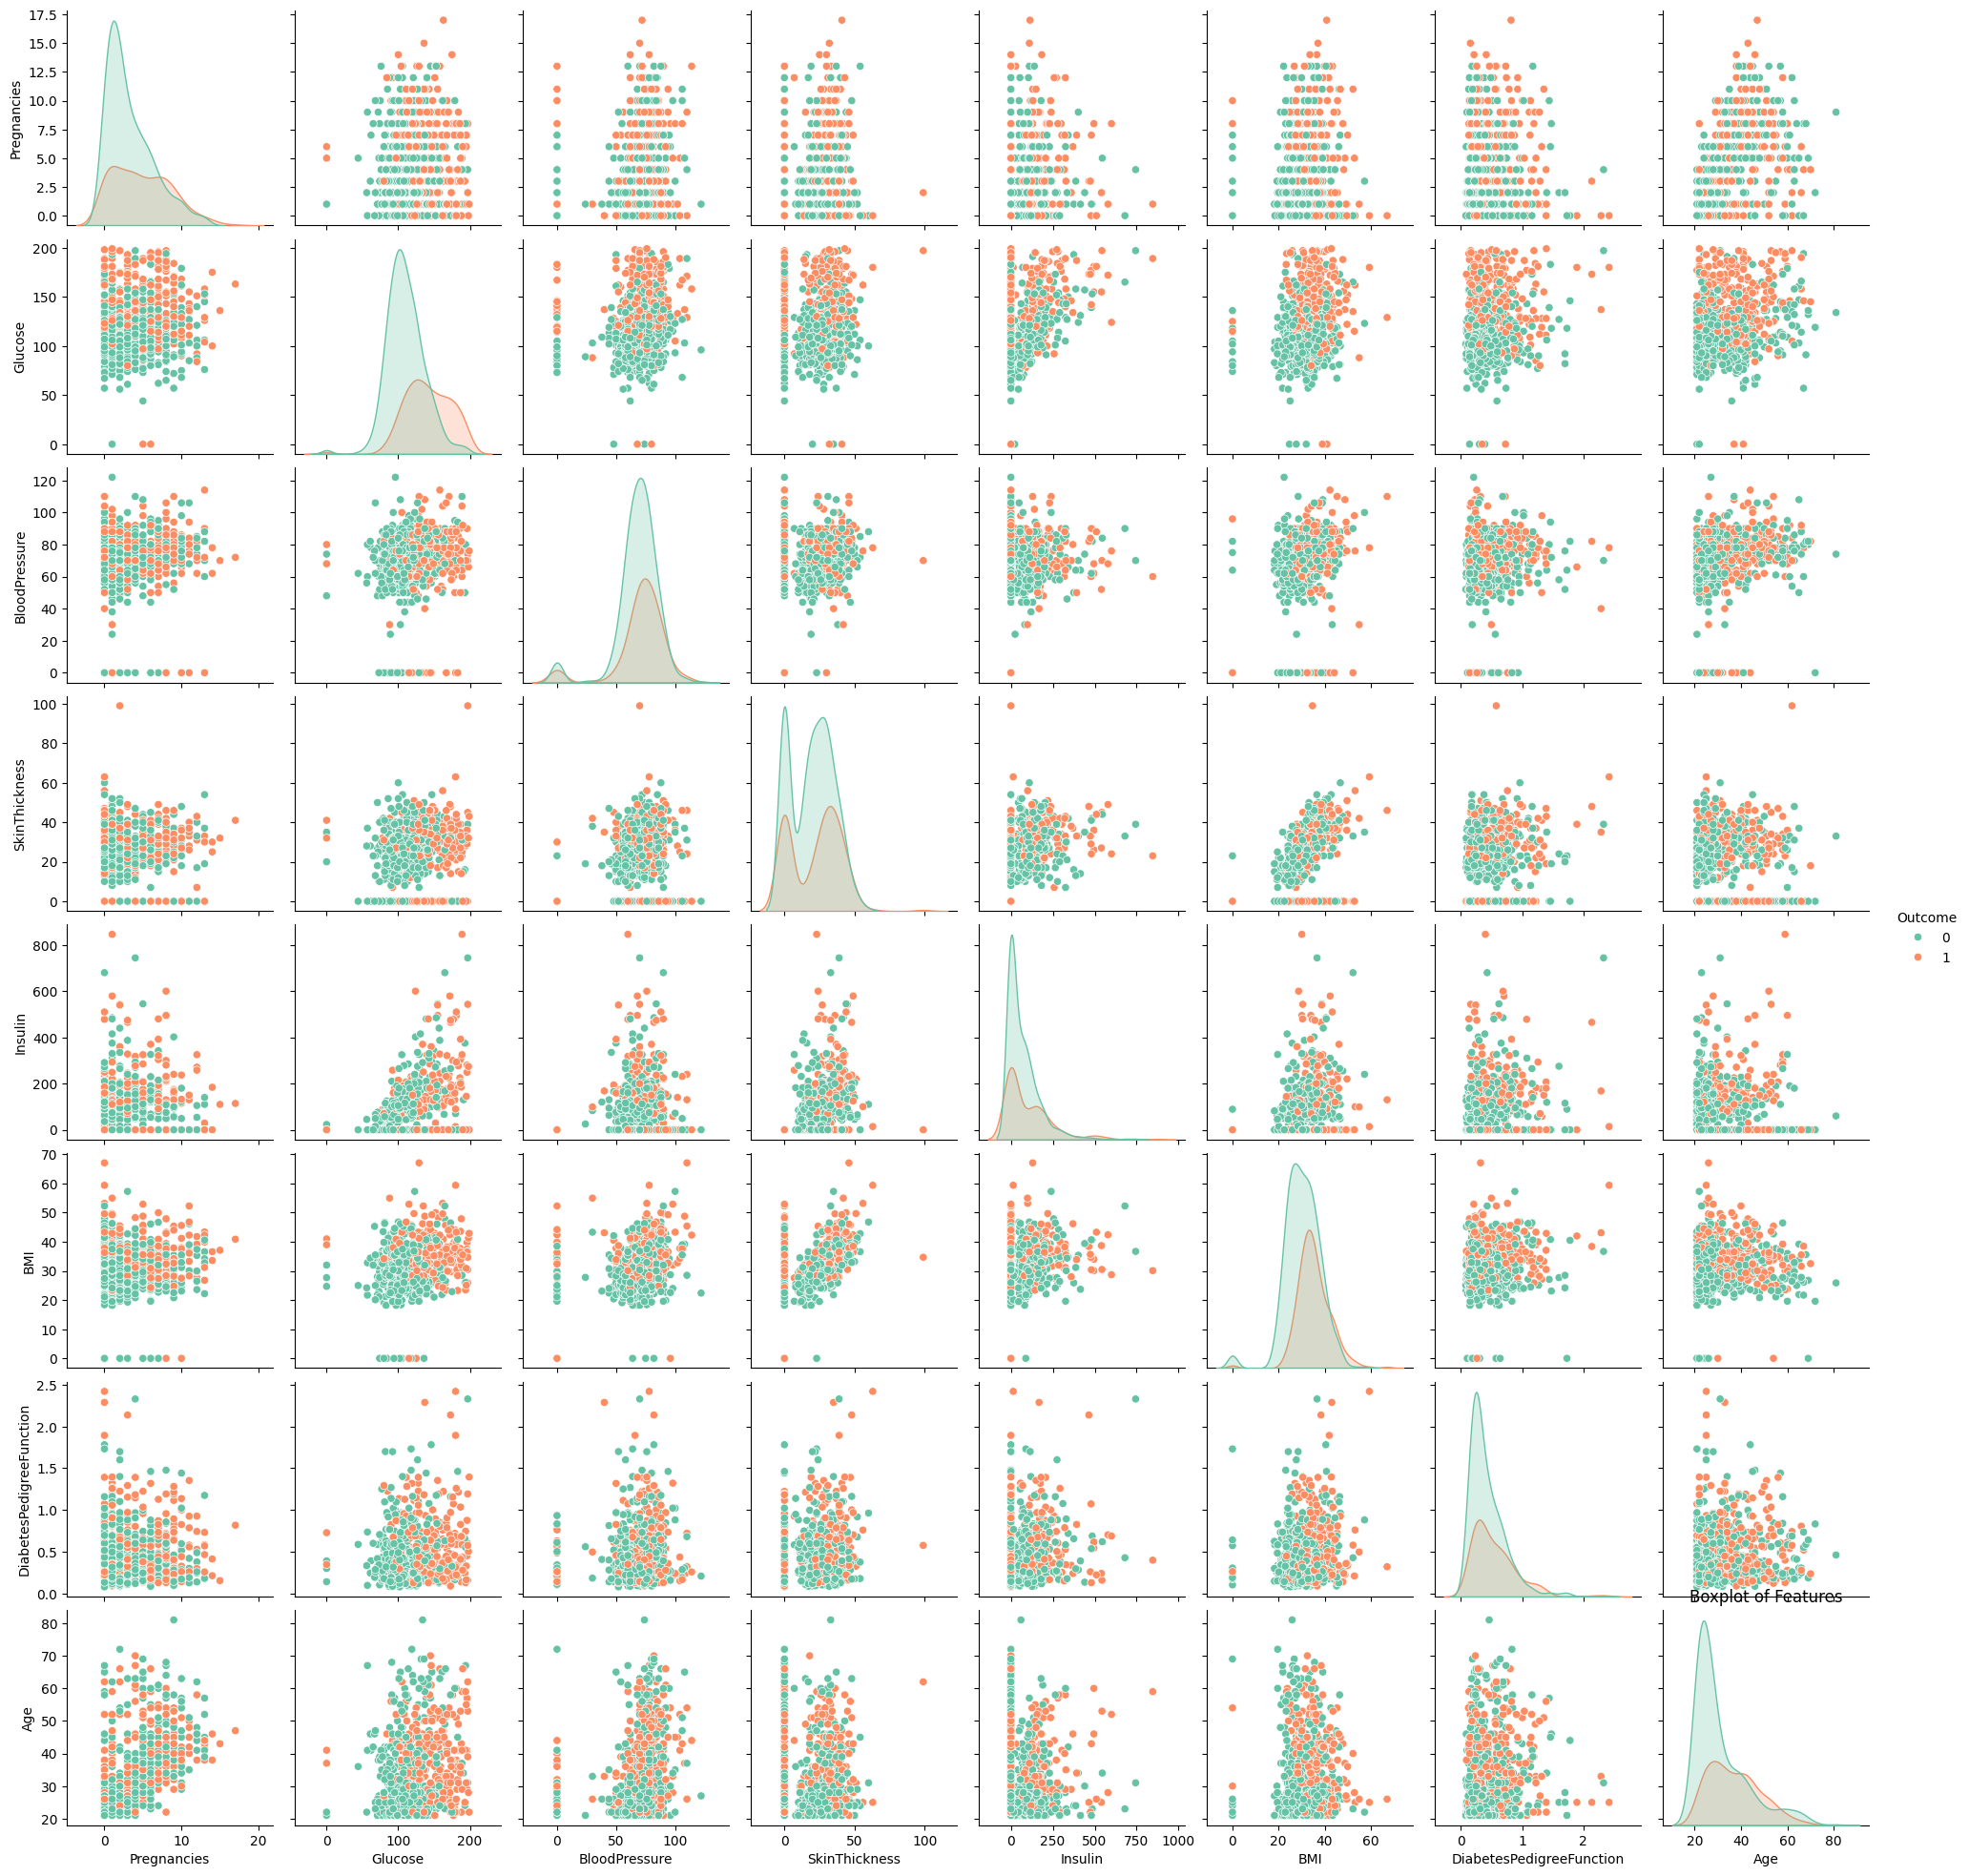

<Figure size 640x480 with 0 Axes>

In [32]:
import seaborn as sns
sns.pairplot(data, diag_kind='kde', hue='Outcome', palette='Set2')
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

 
plt.suptitle("Pairplot of Features")
plt.show()

In [45]:
#step two checking for missing values
import pandas as pd
import numpy as np

# Load dataset
f = "diabetes.csv"
data = pd.read_csv(f)

# Features where 0 values are likely missing data
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 values with the median of each column
for col in columns_to_replace:
    median_value = data[col].median()
    data[col] = data[col].replace(0, median_value)

# Check if there are still 0s
print(data[columns_to_replace].describe())


          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      27.334635   94.652344   32.450911
std     30.438286      12.096642       9.229014  105.547598    6.875366
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      23.000000   30.500000   27.500000
50%    117.000000      72.000000      23.000000   31.250000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [46]:
#step three checking for outliers
#remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
data = remove_outliers_iqr(data, columns_to_replace)
print("new data shape after remove outliers:",data.shape)
 


new data shape after remove outliers: (768, 9)


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop("Outcome", axis=1))  # drop target column
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])  # create new DataFrame without target column
scaled_df["Outcome"] = df["Outcome"].values  # add target column back
#print the out putof the scaled data
print(scaled_df.head())
#print the shape of the scaled data
print("scaled data shape:",scaled_df.shape)
#print min max scaler data
 


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  
scaled data shape: (768, 9)


In [49]:
#check the missing values in the scaled data
print(scaled_df.isnull().sum())
 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [51]:
#step four splitting the data into train, validation and test sets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


# Split into training (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_param
)

# Further split temp into validation (10%) and test (10%)
if y_temp.value_counts().min() < 2:
    stratify_temp = None
    print("Skipping stratify on validation/test split due to low class count.")
else:
    stratify_temp = y_temp

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=stratify_temp
)

# Final confirmation
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (521, 8)
Validation shape: (65, 8)
Test shape: (66, 8)


In [52]:
#step four training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Random Forest model
# - n_estimators=100: number of trees in the forest
# - random_state=42: ensures reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model using the training data
rf_model.fit(X_train, y_train)

# 3. Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# 4. Evaluate the model

# Calculate and print validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")

# Print classification metrics: precision, recall, f1-score for each class
print("\n📊 Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print the confusion matrix to understand prediction breakdown
print("\n🔀 Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
from sklearn.metrics import f1_score

# Binary classification: average='binary' is default if your labels are 0 and 1
f1 = f1_score(y_val, y_val_pred)
print(f"\n🎯 Validation F1-Score (binary average): {f1:.4f}")




✅ Validation Accuracy: 0.7538

📊 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        45
           1       0.62      0.50      0.56        20

    accuracy                           0.75        65
   macro avg       0.71      0.68      0.69        65
weighted avg       0.74      0.75      0.75        65


🔀 Validation Confusion Matrix:
[[39  6]
 [10 10]]

🎯 Validation F1-Score (binary average): 0.5556


In [13]:
# Predict on test set
y_test_pred = rf_model.predict(X_test)

# Accuracy and report Accuracy     = (TP + TN) / Total
# F1-Score     = 2 * (Precision * Recall) / (Precision + Recall)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print("\n📊 Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)
print("\n🔀 Test Confusion Matrix:\n", test_cm)
#print F1 score 
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"\nF1 Score: {f1:.4f}")



✅ Test Accuracy: 0.7576

📊 Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.73      0.38      0.50        21

    accuracy                           0.76        66
   macro avg       0.75      0.66      0.67        66
weighted avg       0.75      0.76      0.73        66


🔀 Test Confusion Matrix:
 [[42  3]
 [13  8]]

F1 Score: 0.7318


AUC: 0.8132


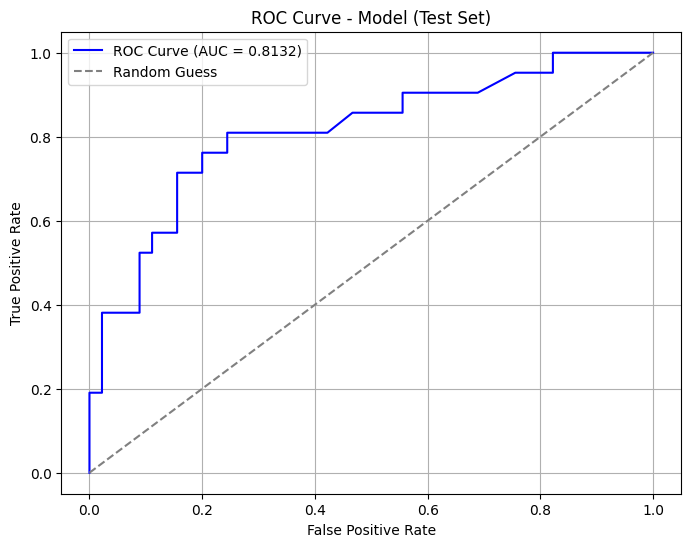

In [53]:
#Step 6: Model Evaluation
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Get predicted probabilities for the positive class
y_test_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_test_probs)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = {:.4f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#The ROC curve indicates that the model has a reasonably good performance in classifying 
# the positive and negative classes, with an AUC of 0.8132 reflecting a strong ability to 
# avoid false positives while maximizing true positives.

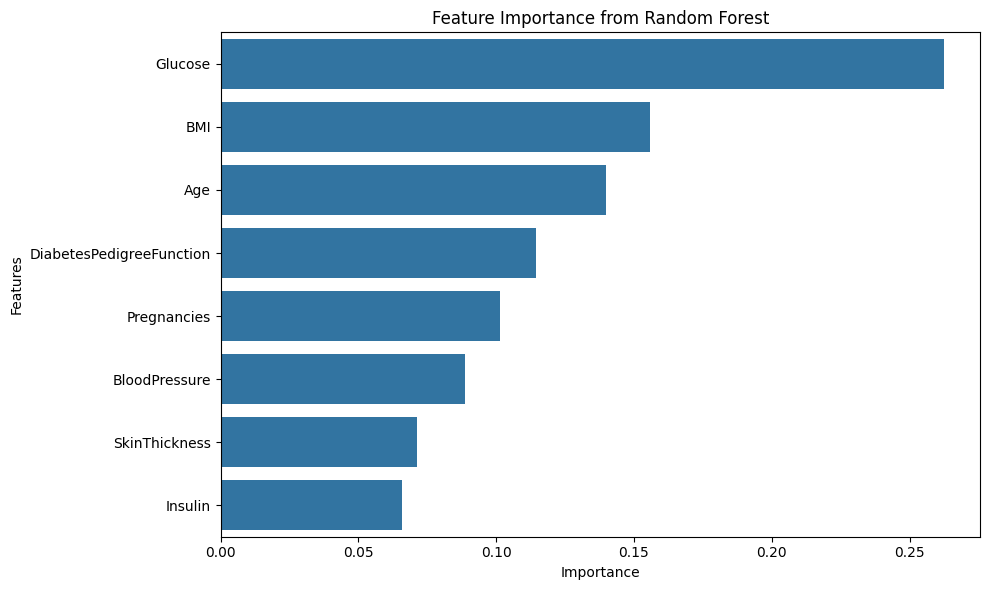

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get importances and sort them
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
#Step 7: Model Optimization (Hyperparameter Tuning)
from sklearn.model_selection import GridSearchCV

# Define grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Setup grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train
grid_search.fit(X_train, y_train)

# Best model
print("\n🔍 Best Parameters from GridSearchCV:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate best model on test set
best_pred = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)
print(f"\n✅ Best RF Test Accuracy: {best_accuracy:.4f}")


: 

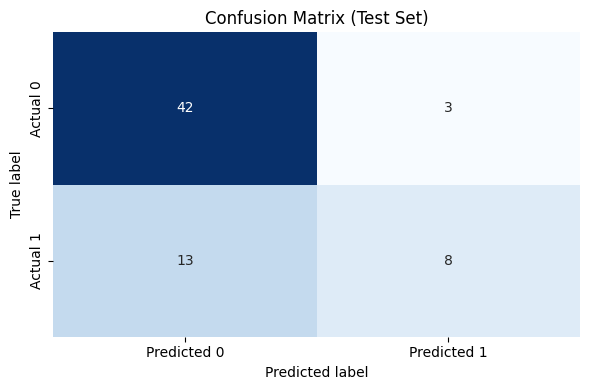

In [56]:
# Pretty confusion matrix for test set
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, best_pred),
            annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, f1_score
)
import joblib

# Step 1: Load the dataset
print("📥 Loading dataset...")
data = pd.read_csv("diabetes.csv")

# Step 2: Replace 0s in invalid columns with medians
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_to_replace:
    data[col] = data[col].replace(0, data[col].median())
print("✅ Missing values handled.")

# Step 3: Split features and labels
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Step 4: Split into training, validation, and test sets
print("📊 Splitting data...")
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

if y_temp.value_counts().min() < 2:
    stratify_temp = None
    print("⚠️ Skipping stratify on val/test split due to low class count.")
else:
    stratify_temp = y_temp

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=stratify_temp
)

print(f"🔹 Train shape: {X_train.shape}")
print(f"🔹 Validation shape: {X_val.shape}")
print(f"🔹 Test shape: {X_test.shape}")

# Step 5: Train Random Forest model
print("🚀 Training model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate on validation set
print("📈 Evaluating model...")
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_val, y_val_pred))
print("\n🔀 Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print(f"\n🎯 F1 Score: {f1_score(y_val, y_val_pred):.4f}")

# Step 7: Save the trained model
print("💾 Saving model...")
joblib.dump(rf_model, "rmodel.pkl")
print("✅ Model saved as 'rmodel.pkl'")


📥 Loading dataset...
✅ Missing values handled.
📊 Splitting data...
🔹 Train shape: (614, 8)
🔹 Validation shape: (77, 8)
🔹 Test shape: (77, 8)
🚀 Training model...
📈 Evaluating model...
✅ Validation Accuracy: 0.7403

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        50
           1       0.64      0.59      0.62        27

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.74      0.74      0.74        77


🔀 Confusion Matrix:
 [[41  9]
 [11 16]]

🎯 F1 Score: 0.6154
💾 Saving model...
✅ Model saved as 'rmodel.pkl'
